<a href="https://colab.research.google.com/github/andres-gv/prueba_2020_07_15/blob/master/2_Diferencias_Finitas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://youtu.be/vUwzhoJ8HjA
## Diferencias Finitas

- Las derivadas contínuas se transforman en derivadas discretas a través de expasión de las derivadas en series de Taylor. 

- Dependiendo de la precisión de la aproximación se eligen una cantidad finita de términos de la serie para cada derivada.

- Se reemplazan estas aproximaciones en la ecuación a resolver y en la malla de puntos definida.

http://web.media.mit.edu/~crtaylor/calculator.html

## Conducción Térmica
Una placa con un perfil de temperaturas dado en un lado y flujo de calor nulo en los demás bordes

$(\frac{\partial^2}{\partial x^2} + \frac{\partial^2}{\partial y^2}) u(x,y) = f(x,y)$

Dirichlet bc:

u(x,0) = 300
u(1,y) = 300-200y

Neumann bc:

$\frac{\partial u}{\partial x} = 0$ for $x = 0$

$\frac{\partial u}{\partial y} = 0$ for $y = 0$

In [ ]:
!pip install findiff

In [6]:
from findiff import FinDiff, PDE, BoundaryConditions, Coef, Identity #,Id
import numpy
from numpy import meshgrid, sin

import numpy as np
import scipy.sparse as sparse
from scipy.sparse.linalg import spsolve

shape = (100, 100)
x, y = np.linspace(0, 1, shape[0]), np.linspace(0, 1, shape[1])
dx, dy = x[1]-x[0], y[1]-y[0]
X, Y = np.meshgrid(x, y, indexing='ij')

L = FinDiff(0, dx, 2) + FinDiff(1, dy, 2)
f = np.zeros(shape)



In [7]:
bc = BoundaryConditions(shape)
bc[1,:] = FinDiff(0, dx, 1), 0  # Neumann BC
bc[-1,:] = 300. - 200*Y   # Dirichlet BC
bc[:, 0] = 300.   # Dirichlet BC
bc[1:-1, -1] = FinDiff(1, dy, 1), 0  # Neumann BC

In [8]:
pde = PDE(L, f, bc)
u = pde.solve()

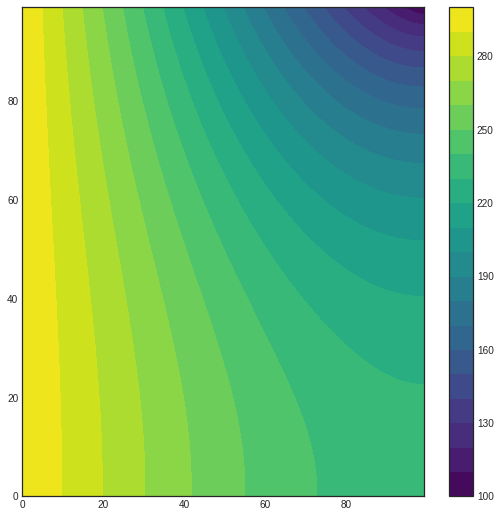

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import numpy as np

fig, ax = plt.subplots(figsize=(9,9))
ccx = ax.contourf(u, 20, cmap='viridis')
fig.colorbar(ccx) # Add a colorbar to a plot
plt.show()